In [ ]:
!apt install libzbar0
!pip install pyzbar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (268 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../libv4lconvert0_1.14.2-1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.14.2-1) ...
Selecting p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the libraries
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import Image, display 
from pyzbar.pyzbar import decode
import keras
from PIL import Image, ImageOps


plt.style.use('fivethirtyeight')

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Keras version:', tf.keras.__version__)
print('Tensorflow version:',tf.__version__)

Num GPUs Available:  0
Keras version: 2.7.0
Tensorflow version: 2.7.0


In [ ]:
img = cv2.imread("/content/drive/MyDrive/15122021090430-0072.tif")

code = decode(img)
print(code)

[Decoded(data=b'14', type='QRCODE', rect=Rect(left=1380, top=1791, width=208, height=201), polygon=[Point(x=1380, y=1791), Point(x=1381, y=1992), Point(x=1588, y=1992), Point(x=1587, y=1791)]), Decoded(data=b'15', type='QRCODE', rect=Rect(left=1382, top=2185, width=207, height=201), polygon=[Point(x=1382, y=2185), Point(x=1382, y=2386), Point(x=1589, y=2386), Point(x=1588, y=2185)]), Decoded(data=b'13\n', type='QRCODE', rect=Rect(left=1379, top=1341, width=207, height=202), polygon=[Point(x=1379, y=1343), Point(x=1379, y=1543), Point(x=1586, y=1543), Point(x=1586, y=1341)]), Decoded(data=b'12\n', type='QRCODE', rect=Rect(left=1379, top=889, width=207, height=202), polygon=[Point(x=1379, y=889), Point(x=1379, y=1091), Point(x=1586, y=1090), Point(x=1586, y=889)]), Decoded(data=b'11', type='QRCODE', rect=Rect(left=1378, top=482, width=207, height=201), polygon=[Point(x=1378, y=482), Point(x=1379, y=683), Point(x=1585, y=682), Point(x=1585, y=482)])]


In [ ]:
rows, columns, _ = img.shape
print("rows :",rows)
print("columns :",columns)

rows : 3510
columns : 2482


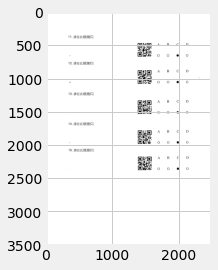

In [ ]:
plt.imshow(img)

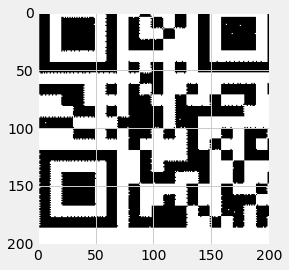

In [ ]:
cut_img_qr = img[496: 698, 1377: 1579]
plt.imshow(cut_img_qr)

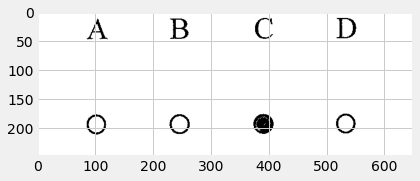

In [ ]:
cut_img_mc = img[496-24: 698+24, 1377+212: 1377+202+660]
plt.imshow(cut_img_mc)

In [ ]:
num_list = []
rect_list = []
for barcode in decode(img):
  print(barcode.rect)
  MyData = barcode.data.decode('utf-8')
  print(MyData)
  num_list.append(MyData)
  rect_list.append(barcode.rect)

print(num_list)
print(rect_list)

cut_img_mc_list = []
for y in range(0, len(rect_list)):
  cut_img_y = img[rect_list[y].top - 24: rect_list[y].top + 226, rect_list[y].left + 212: rect_list[y].left + 862]
  cut_img_mc_list.append(cut_img_y)


Rect(left=1380, top=1791, width=208, height=201)
14
Rect(left=1382, top=2185, width=207, height=201)
15
Rect(left=1379, top=1341, width=207, height=202)
13

Rect(left=1379, top=889, width=207, height=202)
12

Rect(left=1378, top=482, width=207, height=201)
11
['14', '15', '13\n', '12\n', '11']
[Rect(left=1380, top=1791, width=208, height=201), Rect(left=1382, top=2185, width=207, height=201), Rect(left=1379, top=1341, width=207, height=202), Rect(left=1379, top=889, width=207, height=202), Rect(left=1378, top=482, width=207, height=201)]


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/mc_model.h5')

In [ ]:
result = {}
for index, img in enumerate(cut_img_mc_list):
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

  img = cv2.cvtColor(cv2.resize(img, (224,224)), cv2.COLOR_BGR2RGB)
  image = Image.fromarray(img)

  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  image_array = np.asarray(image)

  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

  data[0] = normalized_image_array

  prediction = model.predict(data)
  pd = np.array(prediction).tolist()
  categories = ['A','B','C','D']
  result[int(num_list[index])] = categories[pd[0].index(prediction.max())]
sresult = {}
for i in sorted(result):
  sresult[i] = result[i]
print(sresult)

{11: 'C', 12: 'C', 13: 'C', 14: 'C', 15: 'C'}
